# Timing and Plotting

## Agenda

1. Timing
2. Building a timing utility
3. The `timeit` module
4. Drawing plots with `matplotlib`
5. Timing plots
6. Timing examples
    - list indexing
    - linear search
    - binary search
    - insertion sort
    - collatz conjecture
7. Takeaways

## 1. Timing

The [`time`](https://docs.python.org/3/library/time.html#module-time) module contains functions for obtaining and interpreting the current system time.

In [1]:
import time
time.time()

1590606375.4625757

In [2]:
time.localtime(time.time())

time.struct_time(tm_year=2020, tm_mon=5, tm_mday=27, tm_hour=19, tm_min=7, tm_sec=40, tm_wday=2, tm_yday=148, tm_isdst=0)

converts second data from above to local time

By taking start and stop "timestamps", we can measure the runtime of code:

In [4]:
start = time.time()
time.sleep(0.5) #the amount of time code does nothing
end = time.time()
end - start #code to prove that the duration was 0.5 secs

0.5006833076477051

## 2. Building a timing utility

We can build a utility function for timing the execution of a passed-in function:

In [5]:
def timeit(fn): #ftns in python r objects
    start = time.time()
    fn() 
    end = time.time()
    return end - start

In [6]:
sum(range(10_000)) #sums up all the values from 0 to 9999

49995000

In [8]:
timeit(lambda: sum(range(10_000))) #create lambda for the fn u want to represent the sum

0.0001590251922607422

To make timings more stable, we can run the passed-in function multiple times:

In [9]:
def timeit(fn, number=1):
    total = 0
    for _ in range(number): #underscore is a variable to indicate that we dont care the value we're running it over
        start = time.time()
        fn() 
        end = time.time()
        total += end - start
    return total

In [12]:
timeit(lambda: sum(range(10_000)), number=1000) #runs it 1000 times

0.17103910446166992

Often, we want to time just a portion of a function, or we need to run some setup code (that we don't wish to time) before running the function to time ...

## 3. The `timeit` module

The [`timeit`](https://docs.python.org/3/library/timeit.html) module is a built-in library for measuring the execution of code passed in as a string. It also supports passing in "setup" code that is not timed.

In [13]:
import timeit
timeit.timeit('sum(r)', #code we wanna time
              setup='r = range(10_000)', #set up things we wanna use in our call 
              number=1000) #number of times to run it 

0.1746203415095806

We can easily use this to gather timings for multiple input values:

In [14]:
[timeit.timeit('sum(r)',
               setup='r = range({})'.format(n),
               number=1000)
 for n in range(1000, 10_000, 1000)]
#run the sum from 0 to 1000, increasing in increments of 1000

[0.013955166563391685,
 0.03362554870545864,
 0.04789692722260952,
 0.06776081584393978,
 0.07935634441673756,
 0.10627397336065769,
 0.11260469444096088,
 0.12889265269041061,
 0.14478508196771145]

Sometimes we might want to make use of functions defined in our notebook in the timed/setup code passed to `timeit`. We need to use the `globals` argument for this:

In [15]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [16]:
[fib(n) for n in range(12)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [18]:
[timeit.timeit('fib({})'.format(n),
               number=100,
               globals=globals()) # recall: "globals()" returns a dictionary of everything
                                  # defined in this module; timeit needs it to access `fib`
 for n in range(1, 12)]

[9.914860129356384e-06,
 2.7302652597427368e-05,
 4.6817585825920105e-05,
 8.717551827430725e-05,
 0.0001719389110803604,
 0.00028165988624095917,
 0.0004147924482822418,
 0.0006719417870044708,
 0.001066606491804123,
 0.0018540304154157639,
 0.002895595505833626]

## 4. Drawing plots with `matplotlib`

The [matplotlib library](https://matplotlib.org) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is `matplotlib.pyplot.plot` ([full documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are *not* considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to `plot` to hide its return value):

In [20]:
import matplotlib.pyplot as plt #plotting library, name it plt
import numpy as np #numpy = exposes ftns for numerical computations
import math

# %matplotlib inline <---- needed if not ran in jupyter notebook
# for jupyter notebook to draw plots in lines, inside the notebook
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

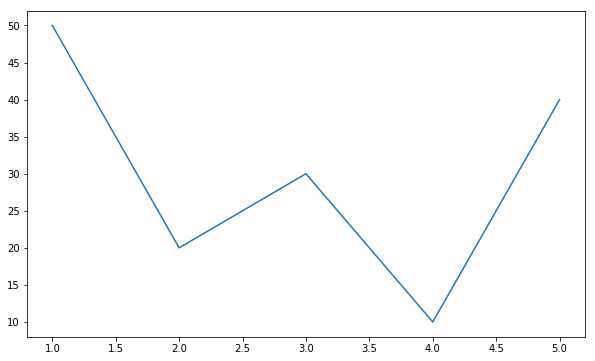

In [21]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40]);

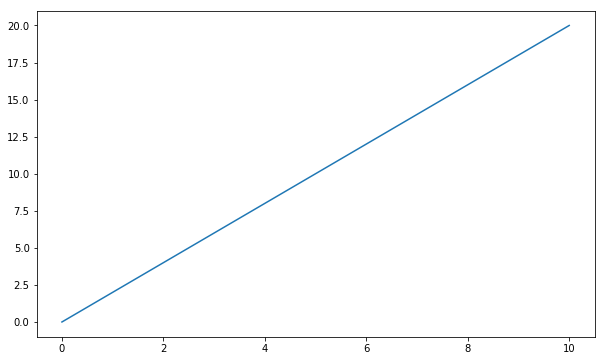

In [23]:
xs = range(11) #use some type of iterable for the x's
ys = [x*2 for x in xs] #dependent on x's, iterable as well
plt.plot(xs, ys); 
#without the semicolon, it returns the line object

We can also provide an optional format string to `plot`, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation of `plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot):

**Markers**

  - `.` : point marker
  - `o` : circle marker
  - `s` : square marker
  - `d` : diamond marker

**Line-styles**
 
  - `-` : solid line style
  - `--` : dashed line style
  - `:` : dotted line style

**Colors**

  - `k` : black
  - `r` : red
  - `g` : blue
  - `b` : green
  - `y` : yellow
  - `c` : cyan
  
Here are the above plots with some color and styling (if we omit a line style no connecting line is drawn between data points):

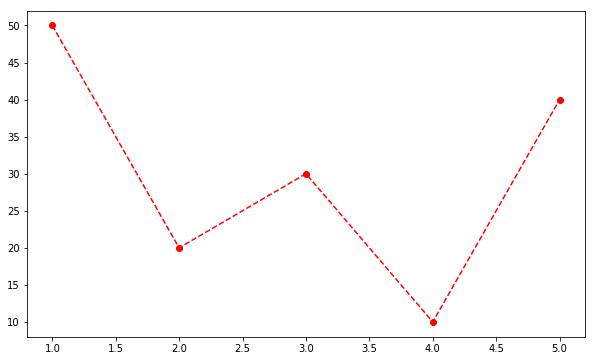

In [25]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40], 'o--r');
#use circles on points and a red dashed line 

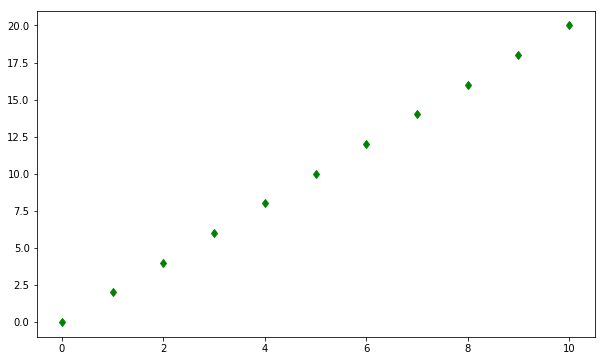

In [27]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg');
#d-g is dashed line, d:g is dotted line, dg is not line, just dots

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org)'s `arange` and `linspace` functions with matplotlib. `arange` is like `range`, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

In [28]:
np.arange(0.5, 2.5, 0.1) #beginning, end (not inclusive), n steps of 0.1
#mimics range 

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [29]:
np.linspace(10, 20, 41) #beginning, end, number of points u want
#linspace take a beginning n an end, inclusive of endpoints and specifies the # of data points in between the two 

array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
       16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75,
       19.  , 19.25, 19.5 , 19.75, 20.  ])

In [30]:
np.linspace(1, 100_000, 50, dtype=int) # we can specify the data type to coerce values into integers

array([     1,   2041,   4082,   6123,   8164,  10204,  12245,  14286,
        16327,  18368,  20408,  22449,  24490,  26531,  28572,  30612,
        32653,  34694,  36735,  38776,  40816,  42857,  44898,  46939,
        48980,  51020,  53061,  55102,  57143,  59184,  61224,  63265,
        65306,  67347,  69388,  71428,  73469,  75510,  77551,  79592,
        81632,  83673,  85714,  87755,  89796,  91836,  93877,  95918,
        97959, 100000])

+ with linspace, if u dont want the endpoint, u write endpoint=False in between the steps n type u want

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval: 

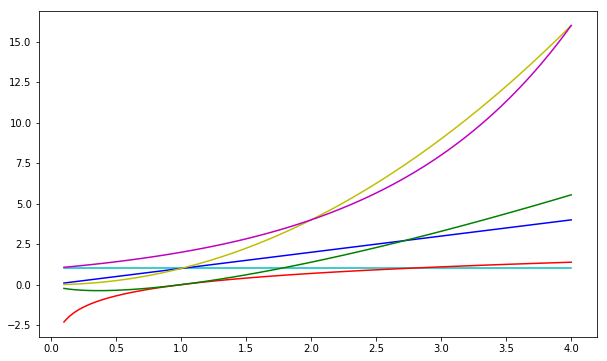

In [31]:
count = 100
xs = np.linspace(0.1, 4, count) #0.1 to 4 that has 100 intervals
ys_const        = [1] * count
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_exponential  = [2**x for x in xs]

plt.plot(xs, ys_const, 'c')
plt.plot(xs, ys_log, 'r')
plt.plot(xs, ys_linear, 'b')
plt.plot(xs, ys_linearithmic, 'g')
plt.plot(xs, ys_quadratic, 'y');
plt.plot(xs, ys_exponential, 'm');

## 5. Plotting timings

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with increasing input sizes.

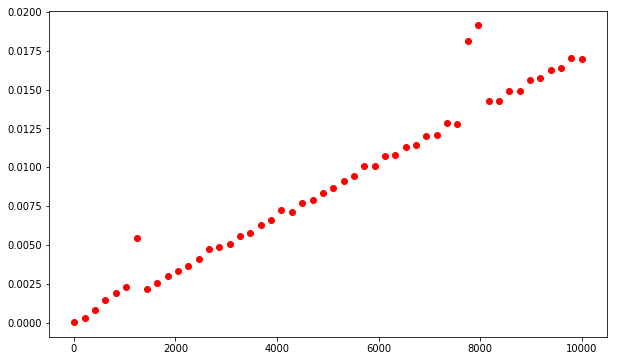

In [32]:
# runtimes for sum for increasing sizes of input

ns = np.linspace(10, 10_000, 50, dtype=int)
ts = [timeit.timeit('sum(range({}))'.format(n), number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on. 

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [33]:
total = 0

for i in range(len(ns)-1):
    total += (ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) # recall: slope = rise / run
    
avg_slope = total / (len(ns)-1)

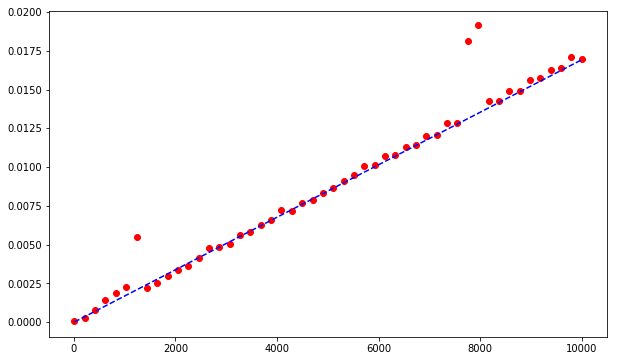

In [34]:
plt.plot(ns, ts, 'or')
plt.plot(ns, [avg_slope*n for n in ns], '--b');

In [35]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print('Runtime of sum(range({:>11,})) ~ {:>5.2f} s'.format(n, avg_slope*n/100))

Runtime of sum(range(          1)) ~  0.00 s
Runtime of sum(range( 10,000,000)) ~  0.17 s
Runtime of sum(range( 20,000,000)) ~  0.34 s
Runtime of sum(range( 30,000,000)) ~  0.51 s
Runtime of sum(range( 40,000,000)) ~  0.68 s
Runtime of sum(range( 50,000,000)) ~  0.85 s
Runtime of sum(range( 60,000,000)) ~  1.02 s
Runtime of sum(range( 70,000,000)) ~  1.18 s
Runtime of sum(range( 80,000,000)) ~  1.35 s
Runtime of sum(range( 90,000,000)) ~  1.52 s
Runtime of sum(range(100,000,000)) ~  1.69 s


+ if the number at the very end is a bit too large maybe we shouldn't be using the ftns we're using currently

We can also use [`polyfit`](https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html) to compute a best-fitting polynomial function of arbitrary degree for our data:

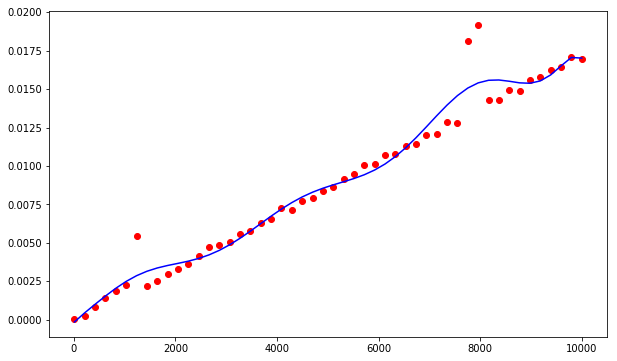

In [38]:
degree = 10 #tries to fit a 10th degree ftn to the line we draw
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, ts, 'or')
plt.plot(ns, [p(n) for n in ns], '-b');

Is there a downside to this approach?
+ we dont know if that's the trend
+ outliers
+ over fitting a curve to my data, doesn't describe the long term trend of my runtime

In [39]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print('Runtime of sum(range({:>11,})) ~ {:>5.2f} s'.format(n, p(n)/100))

Runtime of sum(range(          1)) ~ -0.00 s
Runtime of sum(range( 10,000,000)) ~ -1106163013681876977739618058240.00 s
Runtime of sum(range( 20,000,000)) ~ -1135328837304300466234664706637824.00 s
Runtime of sum(range( 30,000,000)) ~ -65519166846966299919314089546874880.00 s
Runtime of sum(range( 40,000,000)) ~ -1163919031248313409118760581197725696.00 s
Runtime of sum(range( 50,000,000)) ~ -10842342360381895111170980177327947776.00 s
Runtime of sum(range( 60,000,000)) ~ -67143254211635297449451598584311971840.00 s
Runtime of sum(range( 70,000,000)) ~ -313702516330402604434456126652468428800.00 s
Runtime of sum(range( 80,000,000)) ~ -1192540841395374165628924165333543026688.00 s
Runtime of sum(range( 90,000,000)) ~ -3872811164822759707407210440009103441920.00 s
Runtime of sum(range(100,000,000)) ~ -11107683476797997815764616071111363264512.00 s


+ because the line of best fit ends downward in the plot i ran, the estimated runtime for the values above are negative, which is wrong

Choosing an ill-fitting function will likely result in inaccurate runtime predictions. Worse, inaccuracies are compounded as input sizes grow large!

How do we know what class of function to use (e.g., linear, nth-degree polynomial, exponential) for modeling the runtime behavior of algorithms? 

Can we reliably determine this through empirical observation?
+ empirical observations r not the best

## 6. Timing Examples

### Built-in list indexing

What is the runtime behavior of list-indexing?

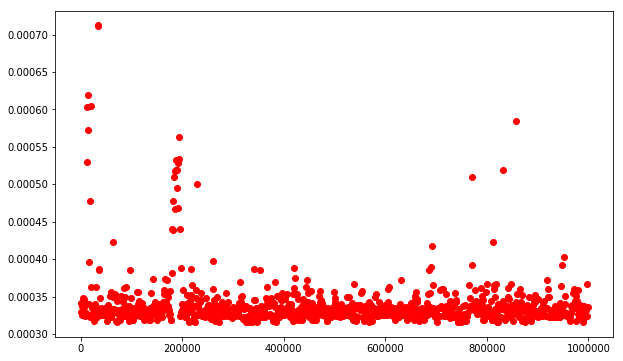

In [40]:
lst = list(range(1_000_000))
ns = np.linspace(0, len(lst), 1000, endpoint=False, dtype=int)
# 0 to the end of the lst, with 1000 datapoints
ts = [timeit.timeit('_ = lst[{}]'.format(n),
                    globals=globals(), 
                    number=10000) 
      for n in ns]

plt.plot(ns, ts, 'or');

Observation: accessing an element in a list by index -- *regardless of where in the list the element is located* -- takes a uniform/constant amount of time.

How? **A Python list uses an array as its underlying data storage mechanism.** Every "slot" of an array is a reference (i.e., a fixed-width address) to an object, and to access an element at a particular index, the underlying code:

1. Computes an *offset* into the array by multiplying the index by the size of a reference
2. Adds the computed offset to the *base address* of the array, giving us the address of the reference
3. Accesses the reference and uses it to load the associated element

Each of the steps above can be performed in constant time.

### Linear Search

What is the runtime behavior of searching for an element in an unsorted list?

In [41]:
def contains(lst, x):
    for y in lst:
        if x == y:
             return True
        else: 
            return False

In [45]:
import random
lst = list(range(100))
random.shuffle(lst)

contains(lst, 10)

False

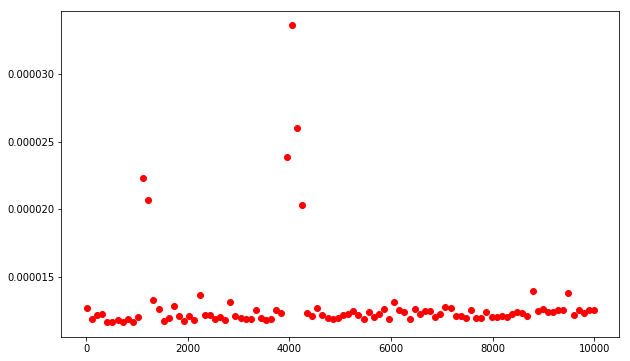

In [47]:
# runtimes when searching for a present element in a randomly shuffled list

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

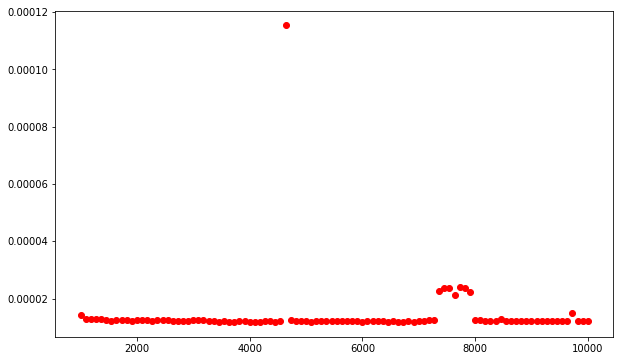

In [48]:
# runtimes when searching for an element that is not present

ns = np.linspace(1_000, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, -1)', 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

### Binary search

What is the runtime behavior of searching for an element in a sorted list using binary search?

In [49]:
def contains(lst, x):
    lo = 0
    hi = len(lst) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if x < lst[mid]:
            hi = mid - 1
        elif x > lst[mid]:
            lo = mid + 1
        else: 
            return True
    else:
        return False

In [50]:
lst = list(range(1000))
contains(lst, 10)

True

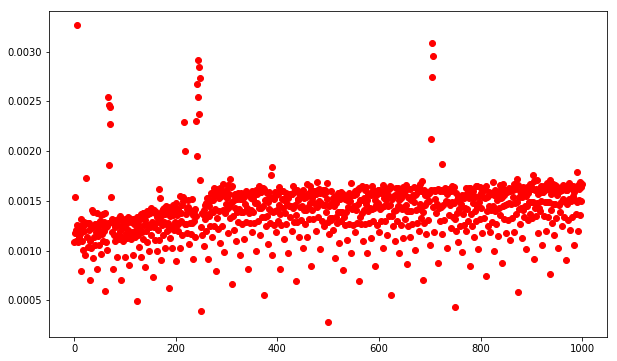

In [51]:
# runtimes when searching for different values in a fixed-size list

lst = list(range(1000))
ns = range(1000)
ts = [timeit.timeit(stmt='contains(lst, {})'.format(x), 
                    globals=globals(), 
                    number=1000)
      for x in range(1000)]

plt.plot(ns, ts, 'or');

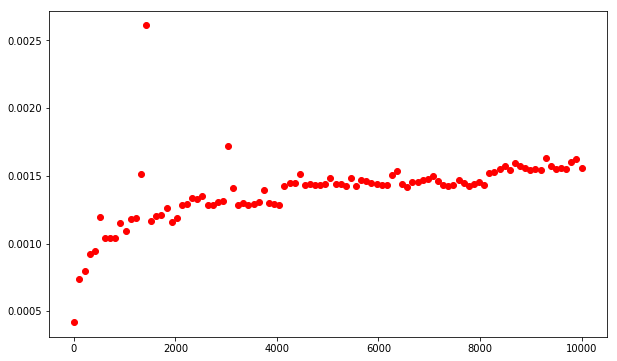

In [52]:
# runtimes when searching for an edge-value in lists of increasing size

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or');

### Insertion sort

What is the runtime behavior of insertion sort?

+ how insertion sort works

4 2 5 3 1 6 0


4 | 2 5 3 1 6 0


4 2 | 5 3 1 6 0


2 4 5 | 3 1 6 0


2 4 5 3 | 1 6 0


2 3 4 5 | 1 6 0


2 3 4 5 1 | 6 0


1 2 3 4 5 | 6 0


1 2 3 4 5 6 | 0


0 1 2 3 4 5 6 |

In [53]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1]
            else:
                break

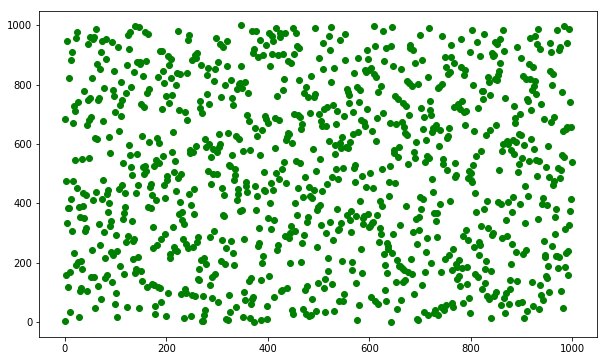

In [54]:
import random
lst = list(range(1000))
random.shuffle(lst)
plt.plot(lst, 'og');

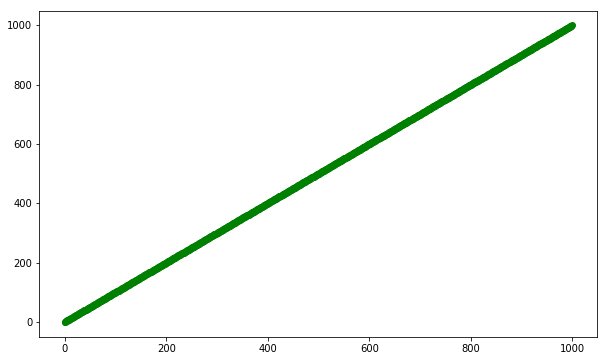

In [55]:
insertion_sort(lst)
plt.plot(lst, 'og');

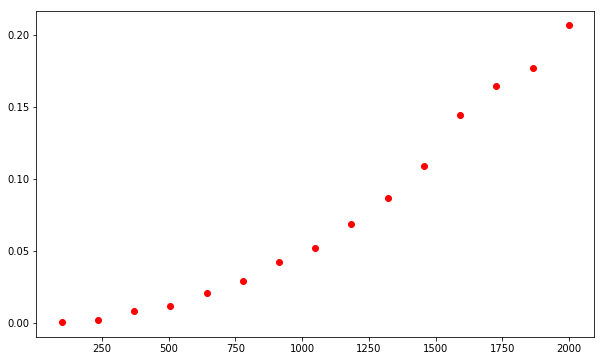

In [56]:
# runtimes for a randomized list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

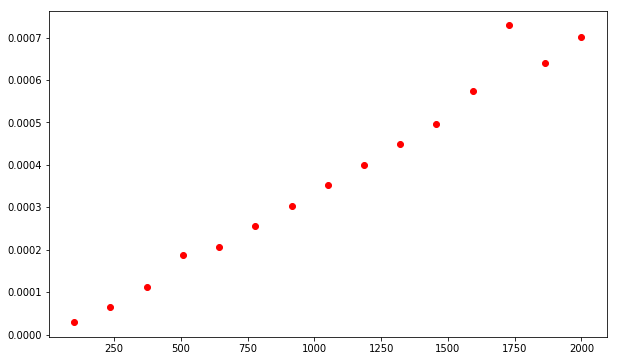

In [57]:
# runtimes for an already sorted list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

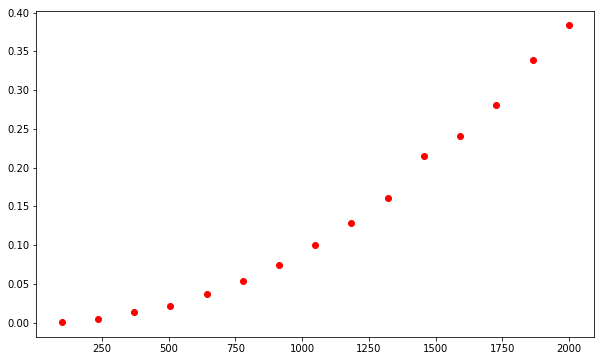

In [58]:
# runtimes for a reversed list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup='lst=list(reversed(range({})))'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

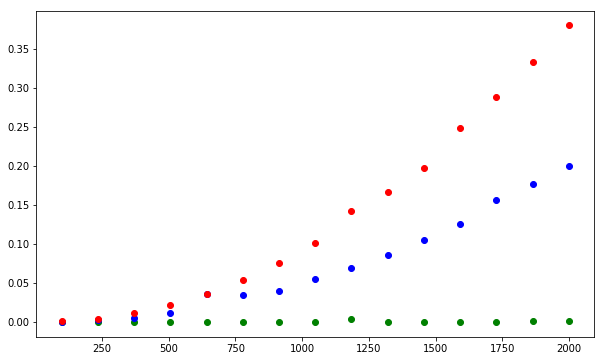

In [59]:
# above runtimes superimposed

ns = np.linspace(100, 2000, 15, dtype=int)
ts1 = [timeit.timeit('insertion_sort(lst)',
                     setup='lst=list((range({})))'.format(n),
                     globals=globals(),
                     number=1)
       for n in ns]
ts2 = [timeit.timeit('insertion_sort(lst)',
                     setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                     globals=globals(),
                     number=1)
       for n in ns]

ts3 = [timeit.timeit('insertion_sort(lst)',
                     setup='lst=list(reversed(range({})))'.format(n),
                     globals=globals(),
                     number=1)
       for n in ns]

plt.plot(ns, ts1, 'og');
plt.plot(ns, ts2, 'ob');
plt.plot(ns, ts3, 'or');

the specific characteristics of the input list impact the runtime of the ftn 

### Collatz conjecture

The Collatz conjecture defines a series of numbers starting with any positive integer $n$, where subsequent terms in the series are computed with the following function:

$f(n) = \begin{cases} n/2 &\mbox{if $n$ is even} \\ 3n+1 & \mbox{if $n$ is odd} \end{cases}$

The conjecture is that regardless of the starting integer, the series ends in 1.

What is the runtime behavior of the Collatz series generating function, for increasing values of $n$?

In [69]:
def collatz(n):
    if n == 1:
        return
    #another loop way
    #elif n%2 == 0:
    #    collatz(n//2)
    #else:
    #    collatz(3*n + 1)
        
    while n != 1:
        #print(n)
        if n%2 == 0:
           n = n//2
        else:
            n = 3*n +1

In [70]:
collatz(100)

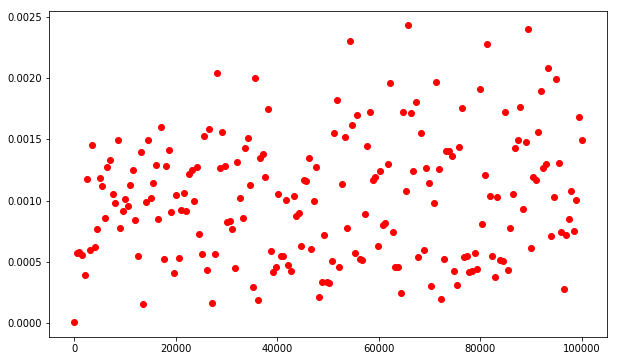

In [71]:
# runtimes for different values of n

ns = np.linspace(1, 100_000, 200, dtype=int)
ts = [timeit.timeit('collatz({})'.format(n),
                     globals=globals(),
                     number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

Proving the conjecture is an open research problem! (I.e., it's possible that the series doesn't terminate for some value of $n$, though such $n$ is not known to exist.)

## 7. Takeaways

- timing and plotting libraries allow us to systematically measure and visualize the runtime behavior of algorithms over different inputs
- different characteristics of input (e.g., shuffled, ordered, reversed) can have a profound impact on the runtime of algorithms
- empirical runtime measurements do not always paint a clear, accurate, or consistent picture of the long-term runtime behavior of a function
- choosing the wrong class of function to describe the runtime behavior of an algorithm can result in disastrously wrong predictions
- timing results are useful, but we need a more systematic and rigorous way of describing and comparing the runtime behavior of algorithms!